#### <span style="color:#4869bc">Сплайн.</span> <span style="color:#b9eee9">повторяй слово "сплайн" медленно на выдохе, и ты реально отдохнёшь.</span> 

# Надо доделать а то непонятно что происходит

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [34]:
n = 10
x = [i for i in range(n)]
y = [i + np.random.uniform(-0.5, 0.5) for i in range(n)]

In [35]:
A, C, B = (1, 4, 1)

F = [0] + [3.0 / n ** 2 * (y[i + 1] - 2 * y[i] + y[i - 1]) for i in range(1, n - 1)] + [0]

alpha = [0, -B / C]
beta = [0, F[0] / C]

for i in range(2, n - 1):
    alpha.append(-B / (A * alpha[i - 1] + C))
    beta.append((F[i - 1] - A * beta[i - 1]) / (A * alpha[i - 1] + C))

In [71]:
x_ = []
for i in range(n - 1):
    x_ += [1.0 * (F[i] - A * beta[i]) / (C + A * alpha[i])]
    
x_ += [0]

In [72]:
b = [(y[i] - y[i - 1]) / 10 + (2 * x_[i] + x_[i - 1]) / 3 * 10 for i in range(n)]
d = [(x_[i] - x_[i - 1]) / 30 for i in range(n)]

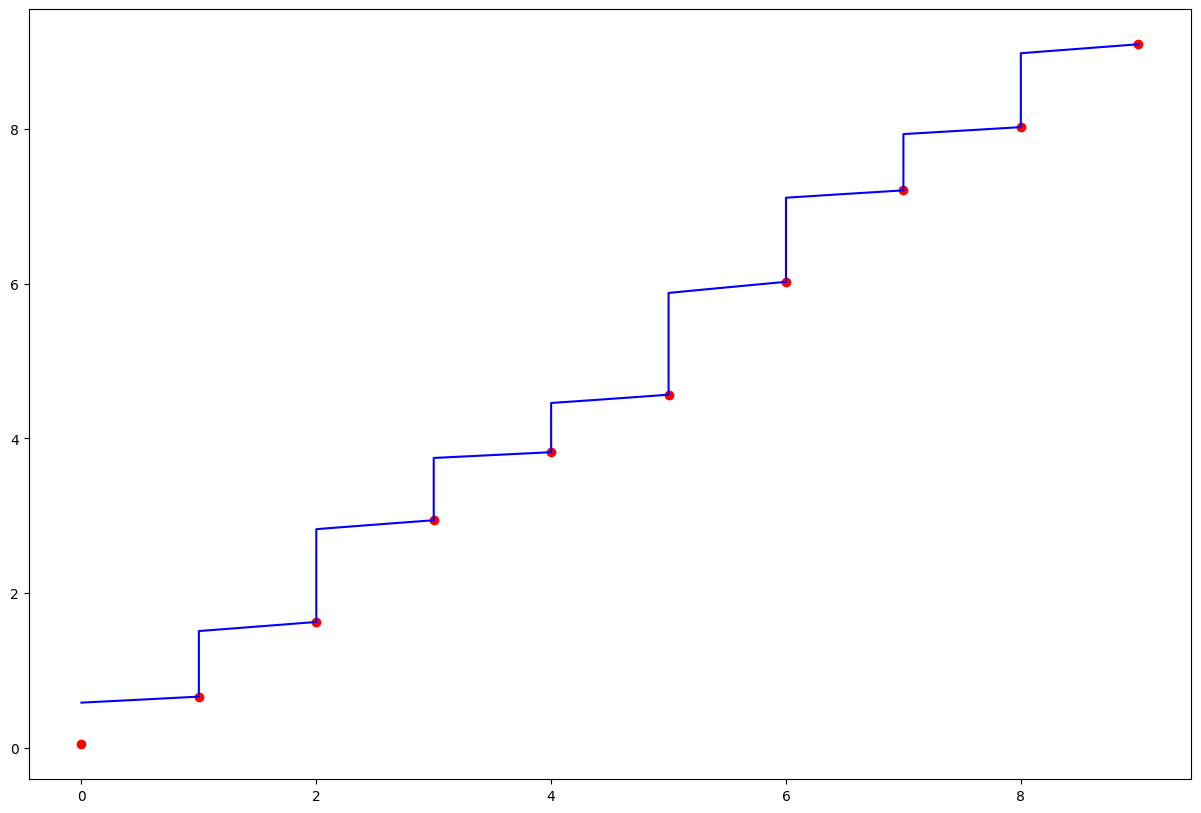

In [73]:
n_line = 10
X, Y = ([], [])
for i in range(1, n):
    X_local = np.linspace(x[i-1], x[i], n_line)
    Y.extend(y[i] + b[i] * (X_local - x[i]) + x_[i] * (X_local - x[i]) ** 2 + d[i] * (X_local - x[i]) ** 3)
    X.extend(X_local)


from pylab import rcParams
rcParams['figure.figsize'] = 15, 10

plt.scatter(x, y, color='red')
# plt.scatter(2010, answer, color='magenta')
plt.plot(X, Y, color='blue')
plt.show()